# Text mining

En esta notebook vamos a ver un ejemplo básico de **text minning aplicado a cuentos de Hernán Casciari** que están disponibles en internet. El objetivo de text mining es extraer informacion util de una base de datos de texto (corpus). El corpus que veremos aqui esta compuesto por los cuentos que Casciari fue subiendo a su blog, en forma de posteos, a lo largo de los años. 

Vamos a basarnos en este [tutorial](https://www.aprendemachinelearning.com/ejercicio-nlp-cuentos-de-hernan-casciari-python-espanol/) donde la primera parte se trataba de **scrapear** el blog para obtener los textos. Sin embargo la url del blog ya no está disponible y los cuentos se pueden adquirir [aquí](https://hernancasciari.com/libros/) junto a otros contenidos super interesantes como sus audiolibros (sí, es un excelente narrador también). 

La idea entonces es tratar de ver "**que tenia casciari en su cabeza**" cuando escribio estos cuentos desde 2004 hasta 2015

In [ ]:
# Montamos el drive para los archivos
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/blog/"

Mounted at /content/drive


## 1 Cargamos los datos

En vez de conseguir los libros scrapeando la página vamos a cargarlos desde la carpeta de la materia. Son 12 archivos pickleados con terminación .txt correspondientes a los cuentos subidos a su blog en los anios de 2004 a 2015.

A pesar de estar en formato .txt los archivos fueron *pickleados* por lo que debemos cargarlos usando la librería pickle.

In [ ]:
import pickle
import pandas as pd
pd.set_option('max_colwidth',150) # para que las columnas del dataframe muestren hasta 150 caracteres

La carpeta "blog" contiene 12 archivos con los cuentos publicados de Casciari de cada año desde 2004 hasta 2015

In [ ]:
# Lista con los años de las publicaciones
anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

data = {} # Creamos un diccionario vacio
for i, c in enumerate(anios):
    with open(path + c + ".txt", "rb") as file: # abrimos cada archivo .txt
        data[c] = pickle.load(file) # asignamos los años como key al diccionario y el valor es el texto despickleado

In [ ]:
# Revisamos que se haya guardado bien
print(data.keys())
# Veamos algun trozo de texto
print(data['2008'][0:1000])

dict_keys(['2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'])
De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reconoció enseguida el olor inconfundible de la casa de la calle Treintaicinco. Siempre sabemos cuál es la fragancia del sitio donde crecimos; nadie acertaría a explicar de qué está compuesta, pero cada uno de nosotros es capaz de reconocer ese aroma entre miles. Y yo estaba ahora en mi casa de Mercedes. Exactamente en el sitio al que llamábamos el rincón blanco. El rincón blanco siempre fue el epicentro de la casa. El lugar por el que había que pasar para ir a cualquier parte. No era un rincón, sino una prominencia amplia que abultaba el pasillo justo por la mitad. Y tampoco estaba pintada de blanco, pero le decíamos así. Nunca supimos por qué.En todos los hogares hay recovecos y habitaciones que los mayores bautizan sin conciencia, y que 

Si queremos construir un dataframe usando todos escalares como llaves tira error porque espera que el dataframe tenga multiples columnas entonces vamos a pasar los valores del diccionario a listas

In [ ]:
data.items()

dict_items([('2004', 'Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácora (una herramienta de publicación cronológica de contenidos en internet) para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media. La repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector.La idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal, Mercedes, o al menos sentirme cerca de su gente; increíblemente, y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia, su desarrollo nunca perdió del todo esa mínima premisa. Ese logro, por supuesto, no fue mío sino de los comentaristas y seguidores del relato.Durante todo el proceso quise generar la ilusión de que la protagonista de la historia —Mirta Bertotti— escribía realmente un diario personal, ayudada en la parte

In [ ]:
# Nuevo diccionario pasando los valores de las llaves a listas
data_combined = {key: [value] for (key, value) in data.items()}

# Creamos el dataframe
data_df = pd.DataFrame.from_dict(data_combined).transpose() # transponemos para que tenga las dimensiones correctas
data_df.columns = ['transcript']                            # renombramos las columnas (en este caso 1)
data_df = data_df.sort_index()                              # ordenamos los indices de forma creciente
print(data_df)

                                                                                                                                                 transcript
2004  Ayer di por finalizada la primera etapa de un experimento de ficción llamado Más respeto, que soy tu madre, en el que usé el recurso de la bitácor...
2005  Nunca en la puta vida me hubiera imaginado que el diario, siempre plagado de maremotos y de incendios de discotecas, pudiera traer alguna vez una ...
2006  Más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros, o no firmados pero sí apro...
2007  Desde hace días la Nina quiere interactuar conmigo. Todavía es prematuro decir que intenta tener una relación estable, pero ya empiezo a oír los e...
2008  De pronto yo estaba en el hogar donde pasé la infancia; lo supo primero mi nariz. Los ojos se acostumbran tarde a la penumbra, pero mi olfato reco...
2009  Google ha lanzado esta semana Latitude, un servicio gratui

## 2 Limpieza de datos

Ahora aplicaremos algunos de los filtros de limpieza que se suelen usar para poder tratar el texto:

* Pasar texto a minúsculas
* Quitar signos de puntuación (interrogación, y otros símbolos)
* Quitar espacios extra, cambio de carro, tabulaciones

Para eso vamos a ultilizar las librerías "re" y "string"

In [ ]:
import re       # libreria de expresiones regulares
import string   # libreria de cadena de caracteres

RECORDAMOS: Expresiones regulares usan '\\' para formas especiales, ej: '\n' es salto de linea. si queremos imprimir una cadena de caracteres que sea '\\' seguido de 'n' se usa la notacion de cadena *raw* en Python que es poner una 'r' antes de la cadena de caracteres.

Dicho esto, para encontrar coincidencias en strings en python se utiliza la libreria [re](https://docs.python.org/es/3/library/re.html) de expresiones regulares.

Hay muchisimas expresiones y caracteres especiales que sirven para trabajar con texto. Les invito a buscar en la documentacion mas informacion. Vamos a mostrar aca las mas usuales:

  " . ": coincide con cualquier caracter excepto con una nueva línea

  "\*": Hace que el RE resultante coincida con 0 o más repeticiones del RE precedente, tantas repeticiones como sean posibles. ab* coincidirá con “a”, “ab” o “a” seguido de cualquier número de “b”.

  ?: Hace que la RE resultante coincida con 0 o 1 repeticiones de la RE precedente. ab? coincidirá con “a” o “ab”.

  +: Hace que la RE resultante coincida con 1 o más repeticiones de la RE precedente. ab+ coincidirá con “a” seguido de cualquier número distinto de cero de “b”; no coincidirá solo con “a”.

  [ ]: Se utiliza para indicar un conjunto de caracteres

También se utiliza [string](https://docs.python.org/es/3/library/string.html) que tiene metodos que permiten acceder a distintos tipos de caracteres. Un ejemplo es acceder a los signos de puntuacion con `string.punctuation`

In [ ]:
print(string.punctuation)
print(re.escape(string.punctuation))

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
!"\#\$%\&'\(\)\*\+,\-\./:;<=>\?@\[\\\]\^_`\{\|\}\~


In [ ]:
# Defino una funcion que recibe un texto y devuelve el mismo texto sin singnos,
def clean_text_round1(text):
    # pasa las mayusculas del texto a minusculas
    text = text.lower()                                              
    # reemplaza texto entre corchetes por espacio en blanco.. ¿ y \% no se..
    text = re.sub('\[.*?¿\]\%', ' ', text)                           
    # reemplaza singnos de puntuacion por espacio en blanco.. %s -> \S+ es cualquier caracter que no sea un espacio en blanco
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) 
    # remueve palabras que contienen numeros.
    text = re.sub('\w*\d\w*', '', text)                              
    return text

# Defino una funcion anonima que al pasarle un argumento devuelve el resultado de aplicarle la funcion anterior a este mismo argumento
round1 = lambda x: clean_text_round1(x)

# Dataframe que resulta de aplicarle a las columnas la funcion de limpieza
data_clean = pd.DataFrame(data_df.transcript.apply(round1))

In [ ]:
print(data_clean)

                                                                                                                                                 transcript
2004  ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto  que soy tu madre  en el que usé el recurso de la bitácor...
2005  nunca en la puta vida me hubiera imaginado que el diario  siempre plagado de maremotos y de incendios de discotecas  pudiera traer alguna vez una ...
2006  más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros  o no firmados pero sí apro...
2007  desde hace días la nina quiere interactuar conmigo  todavía es prematuro decir que intenta tener una relación estable  pero ya empiezo a oír los e...
2008  de pronto yo estaba en el hogar donde pasé la infancia  lo supo primero mi nariz  los ojos se acostumbran tarde a la penumbra  pero mi olfato reco...
2009  google ha lanzado esta semana latitude  un servicio gratui

In [ ]:
data_clean.transcript[0]

'ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto  que soy tu madre  en el que usé el recurso de la bitácora  una herramienta de publicación cronológica de contenidos en internet  para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media  la repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector la idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal  mercedes  o al menos sentirme cerca de su gente  increíblemente  y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia  su desarrollo nunca perdió del todo esa mínima premisa  ese logro  por supuesto  no fue mío sino de los comentaristas y seguidores del relato durante todo el proceso quise generar la ilusión de que la protagonista de la historia —mirta bertotti— escribía realmente un diario personal  ayudada en la parte técnica por un supue

In [ ]:
# Hacemos una segunda vuelta de limpieza
def clean_text_round2(text):
    # Sacamos comillas, los puntos suspensivos, <<, >>
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
 
round2 = lambda x: clean_text_round2(x)
 
data_clean = pd.DataFrame(data_clean.transcript.apply(round2))
 
# Lo pickleamos y guardamos
data_df.to_pickle("/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/corpus.pkl")

In [ ]:
print(data_clean)

                                                                                                                                                 transcript
2004  ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto  que soy tu madre  en el que usé el recurso de la bitácor...
2005  nunca en la puta vida me hubiera imaginado que el diario  siempre plagado de maremotos y de incendios de discotecas  pudiera traer alguna vez una ...
2006  más o menos una vez por semana recibo correos de lectores que me informan que han visto textos míos firmados por otros  o no firmados pero sí apro...
2007  desde hace días la nina quiere interactuar conmigo  todavía es prematuro decir que intenta tener una relación estable  pero ya empiezo a oír los e...
2008  de pronto yo estaba en el hogar donde pasé la infancia  lo supo primero mi nariz  los ojos se acostumbran tarde a la penumbra  pero mi olfato reco...
2009  google ha lanzado esta semana latitude  un servicio gratui

In [ ]:
data_clean.transcript[0]

'ayer di por finalizada la primera etapa de un experimento de ficción llamado más respeto  que soy tu madre  en el que usé el recurso de la bitácora  una herramienta de publicación cronológica de contenidos en internet  para contar una historia costumbrista desde la subjetiva de un ama de casa argentina de clase media  la repercusión del proyecto fue tan asombrosa que me gustaría compartir algunos detalles con el lector la idea nació como un juego en el que intenté hacer un pequeño homenaje a mi ciudad natal  mercedes  o al menos sentirme cerca de su gente  increíblemente  y a pesar de la enorme cantidad de lectores de otos países que se interesaron por la historia  su desarrollo nunca perdió del todo esa mínima premisa  ese logro  por supuesto  no fue mío sino de los comentaristas y seguidores del relato durante todo el proceso quise generar la ilusión de que la protagonista de la historia —mirta bertotti— escribía realmente un diario personal  ayudada en la parte técnica por un supue

### Y creamos nuestro “Bag of Words”

A partir del dataset que limpiamos, creamos y contamos las palabras:

In [ ]:
# Vamos a crear la matriz de documentos-terminos usando usando CountVectorizer, y excluiremos las stop words del espaniol
from sklearn.feature_extraction.text import CountVectorizer

# Cargamos del paquete nltk las stopwords del espaniol a la lista "lines"
import nltk
nltk.download('stopwords') # hay que descargar este modulo en particular

lines = nltk.corpus.stopwords.words('spanish')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
print(lines)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Ahora vamos a crear la matriz de terminos-documentos. Para ello hay una funcion de scikit-learn que si le das una secuencia de items de tipo string o byte hace exactamente eso.

In [ ]:
# Inicializo el modelo excluyendo stopwords
cv = CountVectorizer(stop_words=lines)
# Ajustamos el modelo y lo aplicamos al texto de nuestro dataframe generando una matriz esparsa
data_cv = cv.fit_transform(data_clean.transcript)
# Nos creamos un dataframe transformando a densa la matriz generada recien que tiene como columnas las palabras (terminos) y como filas los documentos
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
# Le asignamos los indices del dataframe anterior
data_dtm.index = data_clean.index

In [ ]:
data_cv

<12x29713 sparse matrix of type '<class 'numpy.int64'>'
	with 75062 stored elements in Compressed Sparse Row format>

In [ ]:
data_dtm

,abajo,abananados,abandonaba,abandonado,abandonar,abandonaron,abandoné,abandonó,abanico,abaraja,abaratar,abarcaba,abarcan,abarcar,abarrotada,abastece,abastecer,abastecida,abatible,abc,abdomen,abductor,abdómen,abeba,abecedario,abel,abelardo,aberración,aberrante,abertura,aberturas,abeto,abierta,abiertamente,abiertas,abierto,abiertos,abismal,ablandando,ablandó,...,ínfimo,íntegro,íntegros,íntima,íntimamente,íntimas,íntimo,íntimos,ítem,ómnibus,ópera,óptica,ópticas,óptimo,órbita,órdenes,órgano,órganos,ósea,óseo,óvalo,úlcera,última,últimamente,últimas,último,últimos,única,únicamente,únicas,único,únicos,útero,útil,útiles,útimo,českomoravský,české,šeredova,šeredovà
2004,10,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,3,1,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3,0,0,0,0,11,2,8,4,2,3,4,0,11,0,0,3,0,1,0,0,0,0
2005,15,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,2,0,0,0,0,0,1,0,0,0,1,2,1,0,5,2,0,0,1,...,0,1,0,0,1,0,0,0,3,0,0,5,1,0,0,0,0,0,0,0,0,0,13,2,1,10,5,8,5,1,17,0,3,3,0,0,0,0,0,0
2006,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,2,1,0,2,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,9,1,1,7,7,8,12,1,13,1,0,2,0,0,0,0,0,0
2007,9,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,2,0,1,2,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,7,0,1,20,5,6,13,1,9,0,0,1,0,0,0,0,0,0
2008,9,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,5,0,3,5,4,2,0,0,...,0,0,0,2,0,2,4,1,0,0,1,1,0,0,0,0,0,1,1,0,0,0,12,1,2,16,7,17,11,5,15,0,0,5,0,0,1,1,1,2
2009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,6,1,0,4,4,6,4,0,6,0,0,0,2,0,0,0,0,0
2010,8,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,8,1,4,13,11,9,5,1,9,0,0,2,0,0,0,0,0,0
2011,7,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,8,0,1,2,1,0,0,0,...,0,0,0,1,0,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,0,6,17,4,5,7,0,16,4,0,1,0,0,0,0,0,0
2012,8,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,8,0,3,14,2,1,5,1,7,1,0,1,0,0,0,0,0,0
2013,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,4,1,0,0,0,...,0,0,0,2,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,0,1,5,0,10,4,1,6,1,0,0,0,0,0,0,0,0


----
Vemos que hay palabras que no estan en el idioma espaniol como **českomoravský**. Dependiendo la informacion que queramos obtener con estos datos entonces tal vez es conveniente filtrar este tipo de palabras. Como lo que vamos a analizar en esta notebook es el vocabulario del escritor, en particular el numero de palabras unicas, entonces las vamos a dejar.

**nltk** tiene [corpus](https://www.nltk.org/book/ch02.html) que se pueden cargar y utilizar para filtrar palabras de distintos idiomas o nombres propios.

```
# Ejemplo de palabras en ingles
english_vocab = set(w.lower() for w in nltk.corpus.words.words()) 
```

Ojo! que hay palabras que estan en ingles pero no estan en un *diccionario*, como expresiones tipicas de chats, algunos nombres propios o abreviaturas. Entonces hay que tener cuidado cuando pasamos de mayusculas a minusculas. Si las queremos filtrar entonces tenemos que ser cuidadosxs con el corpus que usamos.

---


Guardo los datos generados

In [ ]:
# Guardamos en formato pickle los dataframes
data_dtm.to_pickle("/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/dtm.pkl")
data_clean.to_pickle('/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/data_clean.pkl')
# Guardamos tambien el objeto CountVectorize
pickle.dump(cv, open("/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/cv.pkl", "wb"))

## 3 Análisis exploratorio

Vamos a explorar el dataset

In [ ]:
# Cargamos el dataframe que generamos previamente
data = pd.read_pickle('/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/dtm.pkl')

# Transponemos para tener una matriz de terminosXdocumentos
data = data.transpose()

data.head()

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
abajo,10,15,4,9,9,0,8,7,8,0,13,6
abananados,0,0,0,0,0,0,0,0,0,0,1,0
abandonaba,1,0,0,0,0,0,0,0,1,0,0,0
abandonado,1,0,0,0,0,0,0,0,0,0,0,0
abandonar,0,0,0,1,0,0,2,0,0,0,0,0


###  Palabras más usadas por año

veamos las palabras más usadas cada año:

In [ ]:
# Creo un diccionario
top_dict = {}

# Por cada año
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30) # Ordeno las filas en forma decreciente y me quedo con las 30 palabras mas usadas
    top_dict[c]= list(zip(top.index, top.values))       # le asigno el año a la key del diccionario y como valor una tupla con la palabra y su frecuencia

print(top_dict)
print("\n")

# Imprimo las 15 palabras mas frecuentes por año
for anio, top_words in top_dict.items():
    print(anio) # imprimo la key
    print(', '.join([word for word, count in top_words[0:14]])) # imprimo las palabras en orden decreciente segun frecuencia y separadas con espacio y coma

{'2004': [('si', 147), ('alex', 103), ('vez', 98), ('lucas', 87), ('cada', 68), ('dos', 63), ('ahora', 63), ('ser', 62), ('después', 61), ('casa', 58), ('años', 57), ('siempre', 55), ('nadie', 52), ('vida', 51), ('ver', 51), ('mundo', 51), ('hace', 50), ('cosas', 49), ('bien', 49), ('tres', 48), ('día', 47), ('nunca', 47), ('así', 44), ('tan', 43), ('noche', 40), ('mejor', 39), ('mismo', 37), ('gente', 36), ('tiempo', 36), ('cabeza', 36)], '2005': [('si', 256), ('dos', 143), ('vez', 132), ('años', 123), ('siempre', 109), ('ser', 107), ('vida', 100), ('tiempo', 95), ('hace', 94), ('ahora', 92), ('entonces', 91), ('mundo', 88), ('después', 87), ('cada', 83), ('dice', 83), ('casa', 81), ('día', 76), ('gente', 76), ('mismo', 75), ('nunca', 72), ('noche', 69), ('hacer', 68), ('tarde', 67), ('cosas', 67), ('lucas', 67), ('veces', 64), ('va', 63), ('bien', 63), ('así', 63), ('ver', 63)], '2006': [('si', 156), ('años', 131), ('dos', 107), ('vez', 100), ('siempre', 97), ('hace', 90), ('mundo', 

Vemos que hay nombres propios, numeros escrito con letras y algunas palabras como el adverbio "tan" que no nos da informacion por si solo. Filtramos estas palabras. 

Tambien vemos que hay palabras que se repiten dentro de las mas frecuentes de cada anio en todos los *anios* que tambien queremos filtrar

### Agregamos Stop Words

Vamos a unir las 12 listas de palabras mas usadas en un nuevo ranking y de esas, tomaremos las "mas usadas" para agregar al listado de Stop Words. Es decir, si una palabra aparecio en el top 30 mas de la mitad de las veces (en 7 anios o mas) entonces la considero una stop word.

Vamos a usar la funcion Counter de la libreria collections que dada una lista de strings nos devuelve la cantidad de repeticiones de cada elemento

In [ ]:
from collections import Counter
 
# Generamos una lista con las 30 palabras mas usadas de cada anio
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]] # armo una lista quedandome solo con las palabras del diccionario que creamos antes
    for t in top:
        words.append(t)                              # agrego cada palabra a la lista vacia, por separado

# usando el metodo .most_common() obtengo las palabras mas usadas, y la cantidad de veces que fue agregada a la lista words
print(Counter(words).most_common())

# Creo una lista de nuevas stop words considerando como stop words a palabras que recibieron mas de la mitad de las cuentas posibles (12 anios)
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
print(add_stop_words)

[('si', 12), ('vez', 12), ('cada', 12), ('dos', 12), ('ahora', 12), ('después', 12), ('casa', 12), ('años', 12), ('hace', 12), ('día', 11), ('nunca', 11), ('siempre', 10), ('mundo', 10), ('mismo', 10), ('ser', 9), ('vida', 9), ('tiempo', 9), ('entonces', 9), ('hacer', 9), ('chiri', 9), ('tres', 7), ('noche', 7), ('dijo', 7), ('bien', 6), ('gente', 6), ('tarde', 6), ('cosas', 5), ('así', 5), ('nadie', 4), ('veces', 4), ('orsai', 4), ('lucas', 3), ('ver', 3), ('menos', 3), ('revista', 3), ('lectores', 3), ('número', 3), ('revistas', 3), ('solo', 3), ('alex', 2), ('tan', 2), ('mejor', 2), ('dice', 2), ('primera', 2), ('sólo', 2), ('decir', 2), ('hombre', 2), ('argentino', 2), ('todavía', 2), ('semana', 2), ('cuatro', 2), ('mil', 2), ('cabeza', 1), ('va', 1), ('mujer', 1), ('andrés', 1), ('gelós', 1), ('pablo', 1), ('salas', 1), ('sido', 1), ('paola', 1), ('diez', 1), ('ustedes', 1), ('medio', 1), ('idea', 1), ('proyecto', 1), ('año', 1), ('argentina', 1), ('gordo', 1), ('cinco', 1), ('sol

### Actualizamos nuestra Bag of Words

Ahora quitaremos las Stop words de nuestro dataset. Usaremos el listado de stop words en espaniol de nltk, el que generamos recién y uno adicional que tiene en cuenta las observaciones que palabras fueron las mas frecuentes 
Ojo! esto puede parecer **arbitrario** y en parte lo es!

Entonces volveremos a cargar los datos limpios y cuando filtramos las stop words agregamos estas dos listas nuevas

In [ ]:
#from sklearn.feature_extraction import text 
 
# Leemos los datos limpios
data_clean = pd.read_pickle('/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/data_clean.pkl')
 
# Agregamos la lista de stop words "lines" las nuevas stop words
for pal in add_stop_words:
    lines.append(pal)

# Creamos la lista que tiene algunos nombres propios que aparecieron entre las palabras mas frecuentes y otro tipo de palabras
more_stop_words=['alex','lucas','andrés','mirta','tres','primer','primera','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    lines.append(pal)
 
# Recreamos la matriz de documentos y terminos pero ustando la nueva lista "mejorada" de stopwords
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index
 
# Lo guardamos en formato pickle
pickle.dump(cv, open("/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/cv_stop.pkl", "wb"))
data_stop.to_pickle("/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/dtm_stop.pkl")

### Nube de Palabras

Queremos ver “que tenia Hernan Casciari en su cabeza” entre 2004 y 2015 en sus cuentos usando WordClouds.

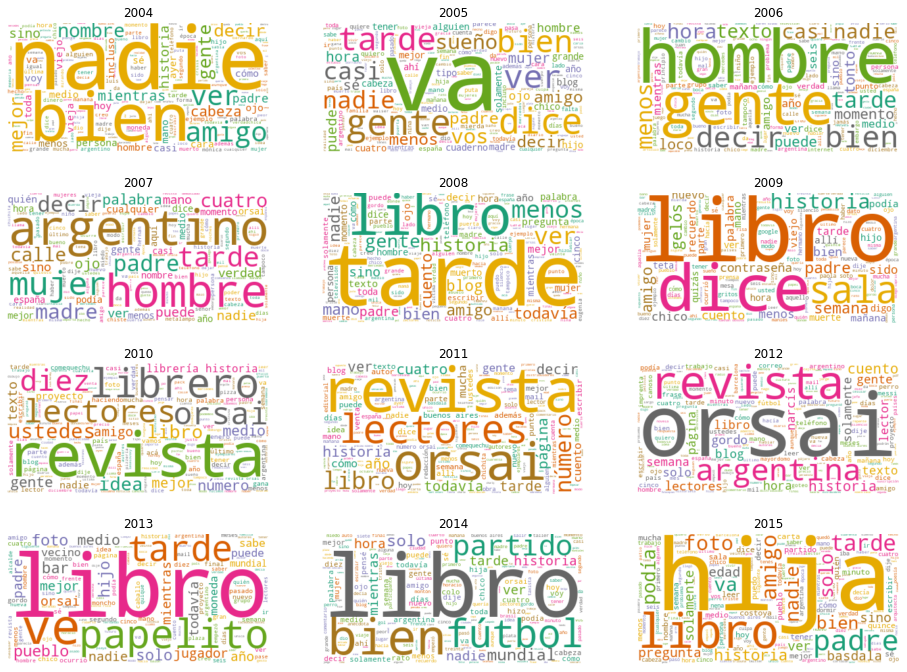

In [ ]:
from wordcloud import WordCloud # importo la funcion WordCloud
import matplotlib.pyplot as plt

# Creo el objeto WordCloud con determinados parametros y utilizando nuestra lista de stopwords
wc = WordCloud(stopwords=lines, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
 
plt.rcParams['figure.figsize'] = [16,12] # tamanio de los plots
 
# Para cada anio creo un WC
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.transcript[anio])  # aca le pido que genere los WC a partir del texto de cada anio
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")  
    plt.axis("off")
    plt.title(anios[index])
plt.show()

La hija de Hernan Casciari nacio en el 2004. Se puede tratar de analizar como el nacimiento de su hija influencio su escritura. En el 2007, cuando ella tenia tres anios, vemos que empezo a tener mas importancia la palabra "padre" en sus cuentos. Y cuando ella tenia once anios, en el 2015, es la palabra mas frecuente. Siguiendo este analisis se puede pensar que verla crecer afecto enormemente el contenido de sus cuentos.

Siguiendo este analisis interpretativo se nota en estas wordclouds algunos topicos importantes que definen su personalidad. Es un escritor que le gusta mucho escribir sobre su vida, por lo que no es de extraniarse que "libro", "revista" u "orsai", su editorial, aparezcan en muchas WCs. Tambien sabemos que es un fanatico del "futbol", y que es muy familiero ("padre", "madre", "hija")


### Estadísticas de Palabras por año

Ahora sacaremos algunas estadísticas de palabras únicas por año (el tamaño del vocabulario empleado) y el promedio de palabras por artículo

In [ ]:
data[data.columns[1]].to_numpy

pandas.core.series.Series

In [ ]:
# Encontraremos las palabras unicas por anio identificando los elementos non-zero en la matriz de documentos y terminos
unique_list = []
for anio in data.columns:
    uniques = data[anio].to_numpy().nonzero()[0].size # tengo que transformar a un array para aplicar la funcion nonzero
    unique_list.append(uniques)
 
# Creo un nuevo dataframe con el numero de palabras unicas por anio
data_words = pd.DataFrame(list(zip(anios, unique_list)), columns=['Anio', 'unique_words'])
#data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort = data_words # sin ordenar
print(data_unique_sort)

    Anio  unique_words
0   2004          6543
1   2005          8876
2   2006          8149
3   2007          7157
4   2008          8998
5   2009          3502
6   2010          4749
7   2011          6842
8   2012          4221
9   2013          4592
10  2014          6879
11  2015          4554


In [ ]:
# El numero de post por anio, esto es dato
posts_per_year = [50, 27, 18, 50, 42, 22, 50, 33, 31, 17, 33, 13]

# Encuentro el numero total de palabras por anio
total_list = []
for anio in data.columns:
    totals = sum(data[anio])
    total_list.append(totals)
    
# Agrego las columnas al dataframe
data_words['total_words'] = total_list
data_words['posts_per_year'] = posts_per_year
data_words['words_per_posts'] = data_words['total_words'] / data_words['posts_per_year']
 
data_wpm_sort = data_words #sin ordenar
print(data_wpm_sort)

    Anio  unique_words  total_words  posts_per_year  words_per_posts
0   2004          6543        16496              50       329.920000
1   2005          8876        27292              27      1010.814815
2   2006          8149        22214              18      1234.111111
3   2007          7157        18462              50       369.240000
4   2008          8998        27276              42       649.428571
5   2009          3502         7256              22       329.818182
6   2010          4749        12929              50       258.580000
7   2011          6842        21207              33       642.636364
8   2012          4221         9840              31       317.419355
9   2013          4592        11695              17       687.941176
10  2014          6879        20173              33       611.303030
11  2015          4554        11428              13       879.076923


#### Visualización de la tabla

Veamos los datos en gráfico de barras horizontales:

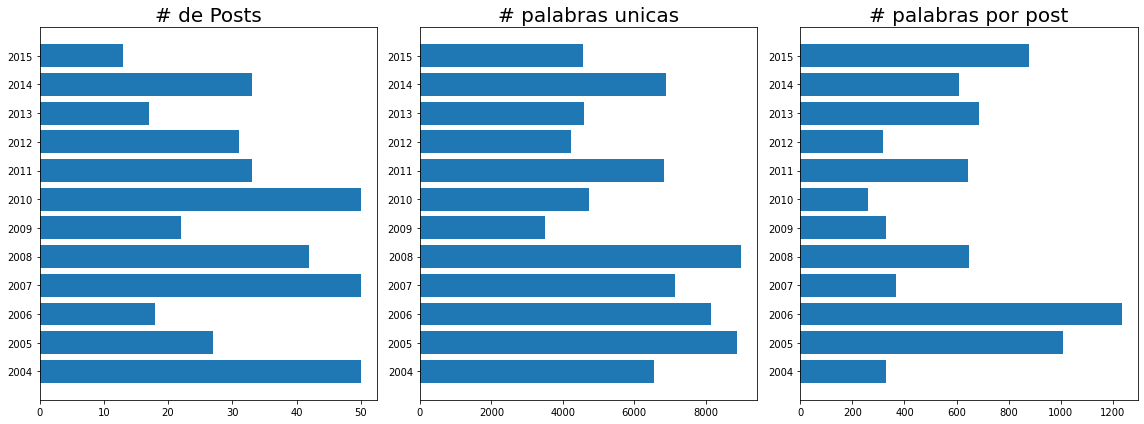

In [ ]:
import numpy as np
plt.rcParams['figure.figsize'] = [16, 6]
 
y_pos = np.arange(len(data_words))
 
plt.subplot(1, 3, 1)
plt.barh(y_pos,posts_per_year, align='center')
plt.yticks(y_pos, anios)
plt.title('# de Posts', fontsize=20)
 
 
plt.subplot(1, 3, 2)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.Anio)
plt.title('# palabras unicas', fontsize=20)
 
plt.subplot(1, 3, 3)
plt.barh(y_pos, data_wpm_sort.words_per_posts, align='center')
plt.yticks(y_pos, data_wpm_sort.Anio)
plt.title('# palabras por post', fontsize=20)
 
plt.tight_layout()
plt.show()

Y hagamos una comparativa de frecuencia de uso de algunas palabras (se pueden elegir cualquiera)

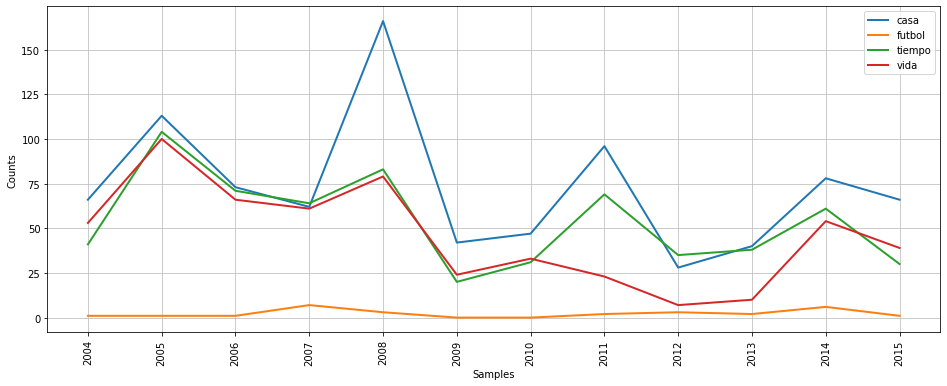

In [ ]:
import nltk
from nltk.corpus import PlaintextCorpusReader

corpus_root = "/content/drive/My Drive/Ari/FCEN/Docencia/ldd1c2021/Clase: procesamiento del lenguaje natural/blog"
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')
#wordlists.fileids() # con esto listamos los archivos del directorio
 
cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in ['casa','futbol','tiempo','vida']
        if w.lower().startswith(word) )
cfd.plot()

## Conclusiones

Repasemos lo que hicimos y que resultados sacamos:

* Limpiamos los textos, quitamos caracteres que no utilizamos y creamos un listado de stop_words (palabras para omitir)

* Exploración de datos:
Realizamos estadísticas básicas, como el vocabulario usado, cantidad de palabras por año y promedio por posts.

* Creamos Nubes de Palabras por año ya que es una manera de visualizar textos y frecuencia de termino a lo largo de los anios (similar a [Google Ngrams Viewer](https://books.google.com/ngrams)) falta dividir por la cantidad total de palabras de cada anio

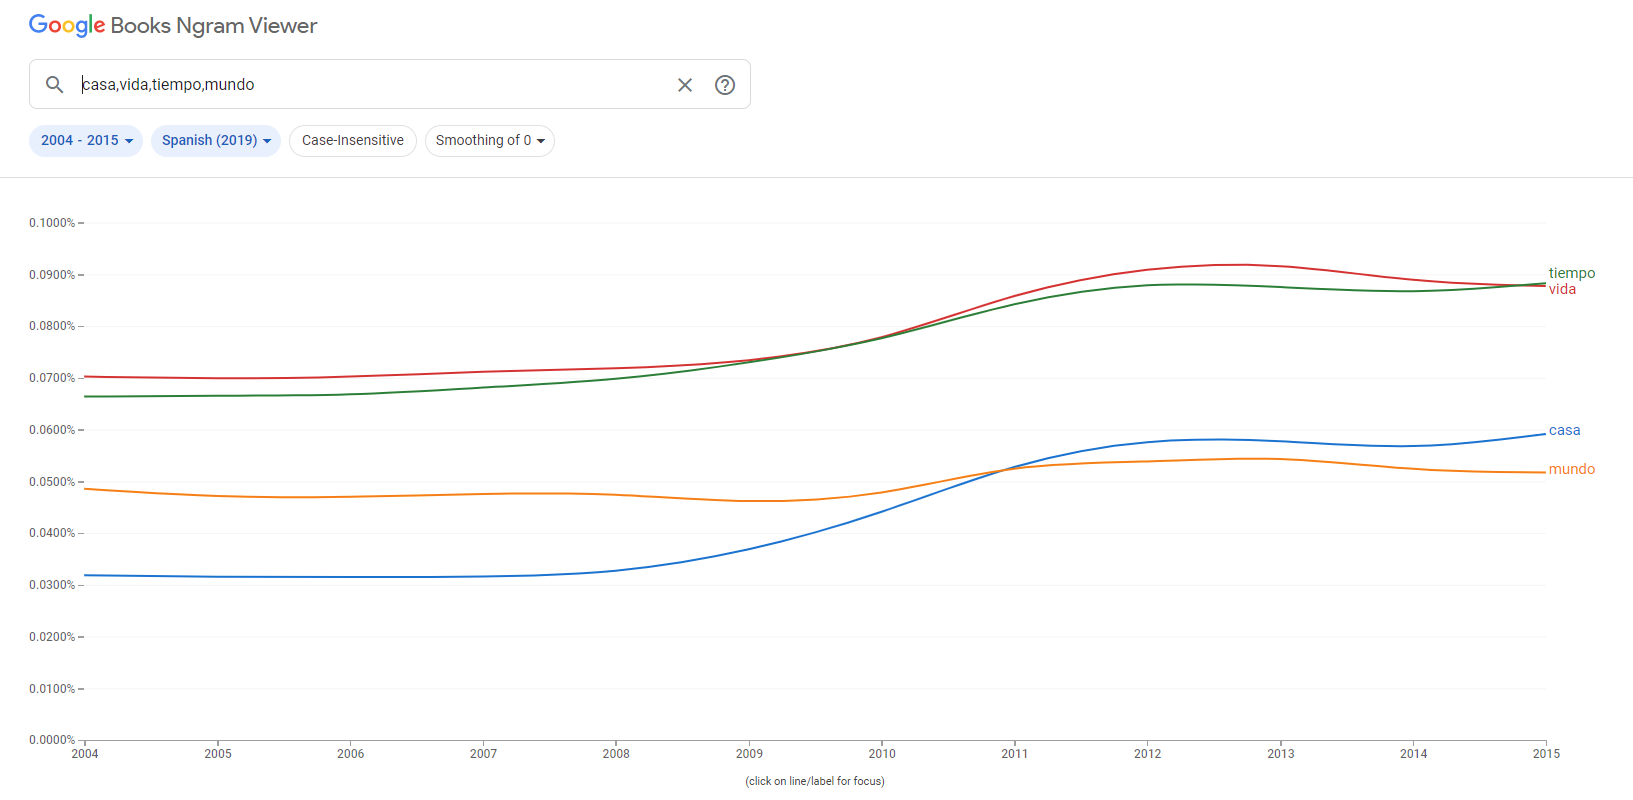

Lo que muestra el eje Y es: de todos los unigrams (palabras unicas) que porcentaje de todos ellos son alguno de estos 4 unigrams